In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
pd.read_csv('/Users/lega/Documents/feature_eng_df_multi_cols_3.csv', encoding='utf-8')

,Unnamed: 0,text,name,year,departure,arrival,theme,latitude,longitude,date_slavery,...,transport_truck,age_0_to_8,age_9_to_17,age_18_to_20,age_21_to_23,age_24_to_26,age_27_to_29,age_30-38,age_39_47,age_48+
0,0,My name is Vi. And I am 28 years old. I arrive...,Vi,2001.0,Vietnam,American Samoa,Forced labour,-14.354000,-170.773600,NaN,...,[],[],[],[],[],[],[],[],[],[]
1,1,Thank you for the opportunity to testify befor...,Beatrice,2005.0,Sri Lank,Lebanon,Domestic slavery,33.900000,35.500000,NaN,...,[],[],[],[],[],[],[],[],[],[]
2,2,My sister and I were living in a village. We w...,Kavita,2004.0,Sri Lank,India,Domestic slavery,24.071318,79.652396,2002-2004,...,[],[],['I was 12'],[],[],[],[],[],[],[]
3,3,I grew up in a village of between 500 and 700 ...,Maria,2005.0,Mexico,United States,Domestic slavery,40.412044,-96.870925,1976-1981,...,[],[],['I was 15'],[],[],[],[],[],[],[]
4,4,"I was living in a village, Karko, in the Nuba ...",Mende,2003.0,Sudan,"['Sudan ', 'United Kingdom ']",War slavery,16.865226,32.271106,1994-2000,...,[],[],['I was 12'],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,1353,"My name is Suleiman Ali, I’m Sudanese. I want ...",Suleiman,2020,Egypt,Libya,Trafficking,26.335100,17.228331,NaN,...,[],[],[],[],[],[],[],[],[],[]
1354,1354,"In Nigeria, it was difficult to make a living....",Shola,2020,Nigeria,Libya,too much themes,26.335100,17.228331,NaN,...,[],[],[],[],[],[],[],[],[],[]
1355,1355,"My name is Seif Eldein. I’m 24 years old, from...",Seif,2020,Chad,Libya,"['Trafficking', 'Forced labour']",26.335100,17.228331,NaN,...,[],[],[],[],[],[],[],[],[],[]
1356,1356,I was begging and sleeping in the street behin...,Rita,2020,Nigeria,"['Italy ', 'Libya ']","['Sexual exploitation', 'Trafficking']",43.769562,11.255814,NaN,...,['truck'],[],[],[],[],[],[],[],[],[]


In [42]:
df = pd.read_csv('/Users/lega/Documents/feature_eng_df_multi_cols_3.csv', encoding='utf-8')

In [43]:
df = df.replace('Sri Lank', 'Sri Lanka')

In [44]:
df = df.drop(columns=['Unnamed: 0'])

In [45]:
def remove_pt_o(yr):
    yr = yr.removesuffix('.0')
    return yr

In [46]:
#df['year'] = df['year'].apply(remove_pt_o)

In [54]:
df['year'].unique()

array([2001, 2005, 2004, 2003, 1997, 2002, 2006, 1996, 2015, 2016, 2013,
       2009, 2010, 2012, 1999, 2011, 2007, 2014, 2018,    0, 2017, 2008,
       2000, 1995, 1993, 1988, 2019, 1994, 1998, 2020], dtype=int32)

In [48]:
df["year"] = df['year'].str.replace('International', '0')

In [49]:
df["year"] = df['year'].str.replace('M', '0')

In [50]:
df["year"] = df['year'].str.replace('Narratives,', '0')

In [51]:
df["year"] = df['year'].fillna('0')

In [52]:
df["year"] = df['year'].astype('float32')

In [53]:
df["year"] = df['year'].astype('int32')

<AxesSubplot:xlabel='year', ylabel='Count'>

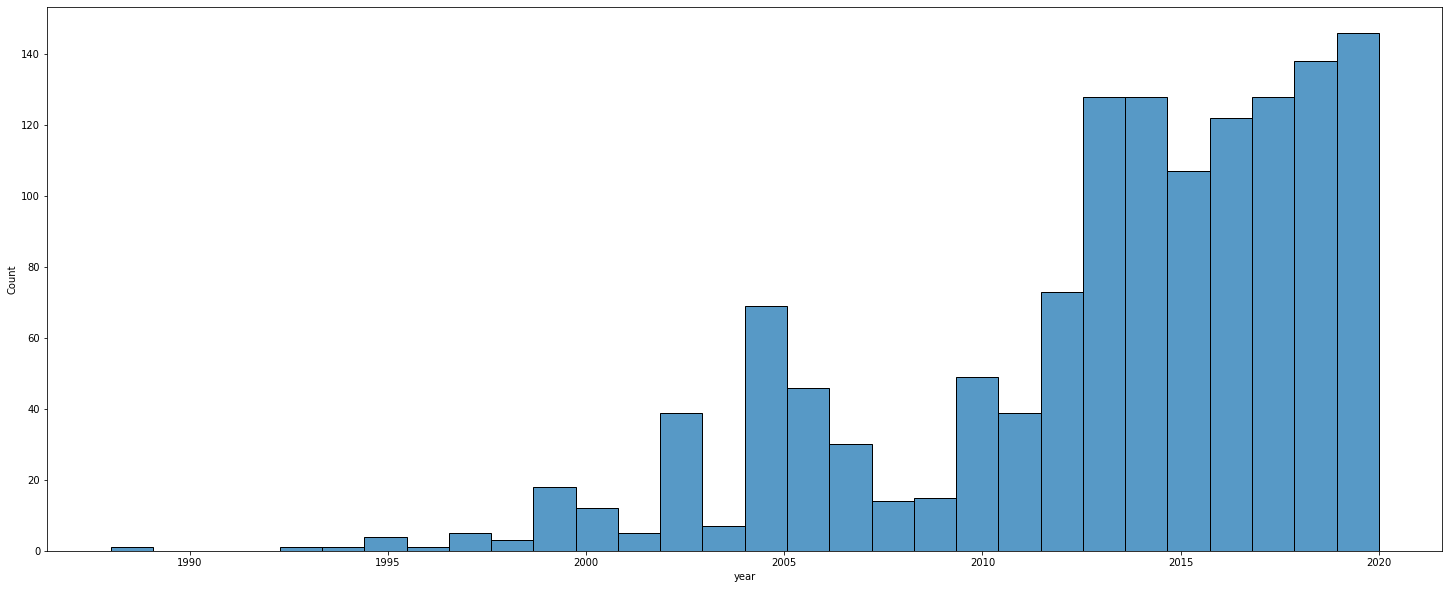

In [29]:
plt.figure(figsize=(25,10))
sns.histplot(df[df['year']!=0]['year'])

In [55]:
df.loc[df['year']==0,'year']=np.nan
#nan does not exist for int

In [56]:
df.dtypes

text             object
name             object
year            float64
departure        object
arrival          object
                 ...   
age_24_to_26     object
age_27_to_29     object
age_30-38        object
age_39_47        object
age_48+          object
Length: 88, dtype: object

In [64]:
df.iloc[:,11:]

,meansOfControlDebtBondage,meansOfControlExcessiveWorkingHours,meansOfControlRestrictsMedicalCare,meansOfControlUsesChildren,control_method_witchcraft,meansOfControlPhysicalAbuse,meansOfControlPsychologicalAbuse,meansOfControlRestrictsFinancialAccess,meansOfControlRestrictsMovement,meansOfControlSexualAbuse,...,transport_truck,age_0_to_8,age_9_to_17,age_18_to_20,age_21_to_23,age_24_to_26,age_27_to_29,age_30-38,age_39_47,age_48+
0,"['debt', 'debts']",[],[],[],[],"['beat', 'beaten', 'beating', 'slapped', 'assa...",['threatened'],"['confiscated', 'benefits']",[],[],...,[],[],[],[],[],[],[],[],[],[]
1,[],[],[],[],[],"['burning', 'scream']","['psychological', 'shame', 'ashamed']","['never paid', 'passport']","['locked', 'locked']",[],...,[],[],[],[],[],[],[],[],[],[]
2,[],[],[],[],[],"['beaten', 'beating', 'tortured', 'tied', 'bea...","['tortured', 'tortured']",[],[],[],...,[],[],['I was 12'],[],[],[],[],[],[],[]
3,[],[],[],[],"['witchcraft', 'curse', 'witch']","['beat', 'raped']","['raped', 'threatened', 'abused']",[],['lock'],['raped'],...,[],[],['I was 15'],[],[],[],[],[],[],[]
4,[],[],[],[],[],"['beat', 'beaten', 'screaming', 'raped']",['raped'],[],[],['raped'],...,[],[],['I was 12'],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,[],[],[],[],[],"['beat', 'burning', 'torture', 'tortured']","['tortured', 'torture', 'torture', 'tortured']",[],"['locked', 'locked']",[],...,[],[],[],[],[],[],[],[],[],[]
1354,[],[],[],[],[],['beat'],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1355,[],[],[],[],[],['shot'],[],[],"['locked', 'locked']",[],...,[],[],[],[],[],[],[],[],[],[]
1356,[],[],[],[],"['oath', 'voodoo']","['beat', 'beaten', 'voodoo', 'knife', 'raped']",['raped'],[],"['go outside', 'leave the house']",['raped'],...,['truck'],[],[],[],[],[],[],[],[],[]


In [67]:
df.iloc[:,77:]

,transport_train,transport_truck,age_0_to_8,age_9_to_17,age_18_to_20,age_21_to_23,age_24_to_26,age_27_to_29,age_30-38,age_39_47,age_48+
0,[],[],[],[],[],[],[],[],[],[],[]
1,[],[],[],[],[],[],[],[],[],[],[]
2,[],[],[],['I was 12'],[],[],[],[],[],[],[]
3,[],[],[],['I was 15'],[],[],[],[],[],[],[]
4,[],[],[],['I was 12'],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...
1353,[],[],[],[],[],[],[],[],[],[],[]
1354,[],[],[],[],[],[],[],[],[],[],[]
1355,[],[],[],[],[],[],[],[],[],[],[]
1356,[],['truck'],[],[],[],[],[],[],[],[],[]


In [71]:
df.iloc[:,11:]

,meansOfControlDebtBondage,meansOfControlExcessiveWorkingHours,meansOfControlRestrictsMedicalCare,meansOfControlUsesChildren,control_method_witchcraft,meansOfControlPhysicalAbuse,meansOfControlPsychologicalAbuse,meansOfControlRestrictsFinancialAccess,meansOfControlRestrictsMovement,meansOfControlSexualAbuse,...,transport_truck,age_0_to_8,age_9_to_17,age_18_to_20,age_21_to_23,age_24_to_26,age_27_to_29,age_30-38,age_39_47,age_48+
0,"['debt', 'debts']",[],[],[],[],"['beat', 'beaten', 'beating', 'slapped', 'assa...",['threatened'],"['confiscated', 'benefits']",[],[],...,[],[],[],[],[],[],[],[],[],[]
1,[],[],[],[],[],"['burning', 'scream']","['psychological', 'shame', 'ashamed']","['never paid', 'passport']","['locked', 'locked']",[],...,[],[],[],[],[],[],[],[],[],[]
2,[],[],[],[],[],"['beaten', 'beating', 'tortured', 'tied', 'bea...","['tortured', 'tortured']",[],[],[],...,[],[],['I was 12'],[],[],[],[],[],[],[]
3,[],[],[],[],"['witchcraft', 'curse', 'witch']","['beat', 'raped']","['raped', 'threatened', 'abused']",[],['lock'],['raped'],...,[],[],['I was 15'],[],[],[],[],[],[],[]
4,[],[],[],[],[],"['beat', 'beaten', 'screaming', 'raped']",['raped'],[],[],['raped'],...,[],[],['I was 12'],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,[],[],[],[],[],"['beat', 'burning', 'torture', 'tortured']","['tortured', 'torture', 'torture', 'tortured']",[],"['locked', 'locked']",[],...,[],[],[],[],[],[],[],[],[],[]
1354,[],[],[],[],[],['beat'],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1355,[],[],[],[],[],['shot'],[],[],"['locked', 'locked']",[],...,[],[],[],[],[],[],[],[],[],[]
1356,[],[],[],[],"['oath', 'voodoo']","['beat', 'beaten', 'voodoo', 'knife', 'raped']",['raped'],[],"['go outside', 'leave the house']",['raped'],...,['truck'],[],[],[],[],[],[],[],[],[]


In [72]:
df_sliced = df.iloc[:,11:].copy()

In [73]:
df_sliced

,meansOfControlDebtBondage,meansOfControlExcessiveWorkingHours,meansOfControlRestrictsMedicalCare,meansOfControlUsesChildren,control_method_witchcraft,meansOfControlPhysicalAbuse,meansOfControlPsychologicalAbuse,meansOfControlRestrictsFinancialAccess,meansOfControlRestrictsMovement,meansOfControlSexualAbuse,...,transport_truck,age_0_to_8,age_9_to_17,age_18_to_20,age_21_to_23,age_24_to_26,age_27_to_29,age_30-38,age_39_47,age_48+
0,"['debt', 'debts']",[],[],[],[],"['beat', 'beaten', 'beating', 'slapped', 'assa...",['threatened'],"['confiscated', 'benefits']",[],[],...,[],[],[],[],[],[],[],[],[],[]
1,[],[],[],[],[],"['burning', 'scream']","['psychological', 'shame', 'ashamed']","['never paid', 'passport']","['locked', 'locked']",[],...,[],[],[],[],[],[],[],[],[],[]
2,[],[],[],[],[],"['beaten', 'beating', 'tortured', 'tied', 'bea...","['tortured', 'tortured']",[],[],[],...,[],[],['I was 12'],[],[],[],[],[],[],[]
3,[],[],[],[],"['witchcraft', 'curse', 'witch']","['beat', 'raped']","['raped', 'threatened', 'abused']",[],['lock'],['raped'],...,[],[],['I was 15'],[],[],[],[],[],[],[]
4,[],[],[],[],[],"['beat', 'beaten', 'screaming', 'raped']",['raped'],[],[],['raped'],...,[],[],['I was 12'],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,[],[],[],[],[],"['beat', 'burning', 'torture', 'tortured']","['tortured', 'torture', 'torture', 'tortured']",[],"['locked', 'locked']",[],...,[],[],[],[],[],[],[],[],[],[]
1354,[],[],[],[],[],['beat'],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1355,[],[],[],[],[],['shot'],[],[],"['locked', 'locked']",[],...,[],[],[],[],[],[],[],[],[],[]
1356,[],[],[],[],"['oath', 'voodoo']","['beat', 'beaten', 'voodoo', 'knife', 'raped']",['raped'],[],"['go outside', 'leave the house']",['raped'],...,['truck'],[],[],[],[],[],[],[],[],[]


In [74]:
def convert_lists(value):
    if value == '[]':
        return 0
    return 1

In [75]:
df_sliced.applymap(convert_lists)

,meansOfControlDebtBondage,meansOfControlExcessiveWorkingHours,meansOfControlRestrictsMedicalCare,meansOfControlUsesChildren,control_method_witchcraft,meansOfControlPhysicalAbuse,meansOfControlPsychologicalAbuse,meansOfControlRestrictsFinancialAccess,meansOfControlRestrictsMovement,meansOfControlSexualAbuse,...,transport_truck,age_0_to_8,age_9_to_17,age_18_to_20,age_21_to_23,age_24_to_26,age_27_to_29,age_30-38,age_39_47,age_48+
0,1,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1354,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1355,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1356,0,0,0,0,1,1,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0


In [76]:
df_sliced = df_sliced.applymap(convert_lists)

In [81]:
df_start = df.iloc[:,:11]

In [87]:
df_w_ones_zeros = pd.merge(df_start, df_sliced, left_index=True, right_index=True)

In [90]:
df_w_ones_zeros.iloc[:,:11]

,text,name,year,departure,arrival,theme,latitude,longitude,date_slavery,gender,accuracy
0,My name is Vi. And I am 28 years old. I arrive...,Vi,2001.0,Vietnam,American Samoa,Forced labour,-14.354000,-170.773600,NaN,female,67.0
1,Thank you for the opportunity to testify befor...,Beatrice,2005.0,Sri Lanka,Lebanon,Domestic slavery,33.900000,35.500000,NaN,female,98.0
2,My sister and I were living in a village. We w...,Kavita,2004.0,Sri Lanka,India,Domestic slavery,24.071318,79.652396,2002-2004,female,97.0
3,I grew up in a village of between 500 and 700 ...,Maria,2005.0,Mexico,United States,Domestic slavery,40.412044,-96.870925,1976-1981,female,100.0
4,"I was living in a village, Karko, in the Nuba ...",Mende,2003.0,Sudan,"['Sudan ', 'United Kingdom ']",War slavery,16.865226,32.271106,1994-2000,male,90.0
...,...,...,...,...,...,...,...,...,...,...,...
1353,"My name is Suleiman Ali, I’m Sudanese. I want ...",Suleiman,2020.0,Egypt,Libya,Trafficking,26.335100,17.228331,NaN,male,100.0
1354,"In Nigeria, it was difficult to make a living....",Shola,2020.0,Nigeria,Libya,too much themes,26.335100,17.228331,NaN,male,80.0
1355,"My name is Seif Eldein. I’m 24 years old, from...",Seif,2020.0,Chad,Libya,"['Trafficking', 'Forced labour']",26.335100,17.228331,NaN,male,100.0
1356,I was begging and sleeping in the street behin...,Rita,2020.0,Nigeria,"['Italy ', 'Libya ']","['Sexual exploitation', 'Trafficking']",43.769562,11.255814,NaN,female,100.0


In [91]:
df_w_ones_zeros.iloc[:,11:]

,meansOfControlDebtBondage,meansOfControlExcessiveWorkingHours,meansOfControlRestrictsMedicalCare,meansOfControlUsesChildren,control_method_witchcraft,meansOfControlPhysicalAbuse,meansOfControlPsychologicalAbuse,meansOfControlRestrictsFinancialAccess,meansOfControlRestrictsMovement,meansOfControlSexualAbuse,...,transport_truck,age_0_to_8,age_9_to_17,age_18_to_20,age_21_to_23,age_24_to_26,age_27_to_29,age_30-38,age_39_47,age_48+
0,1,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1354,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1355,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1356,0,0,0,0,1,1,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0


In [93]:
ToE_data_bar = pd.DataFrame(df_w_ones_zeros[(df_w_ones_zeros.meansOfControlDebtBondage.notna())].meansOfControlDebtBondage.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0))
ToE_data_bar.sort_values(by=0, ascending=False).head(9)

,0
0,1231.0
1,127.0


In [95]:
df_sliced.sum(axis = 0, skipna = True)

meansOfControlDebtBondage              127
meansOfControlExcessiveWorkingHours    132
meansOfControlRestrictsMedicalCare      27
meansOfControlUsesChildren               0
control_method_witchcraft               39
                                      ... 
age_24_to_26                             5
age_27_to_29                             5
age_30-38                                3
age_39_47                                1
age_48+                                  2
Length: 77, dtype: int64

In [96]:
df_w_ones_zeros.sum(axis = 0, skipna = True)

/var/folders/gk/cx1jhdp95mq5vfdjc2p6l0gc0000gn/T/ipykernel_7210/196077880.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_w_ones_zeros.sum(axis = 0, skipna = True)


text            My name is Vi. And I am 28 years old. I arrive...
year                                                    2675381.0
latitude                                             36300.597196
longitude                                            43463.720699
gender          femalefemalefemalefemalemalemalemalefemaleunkn...
                                      ...                        
age_24_to_26                                                    5
age_27_to_29                                                    5
age_30-38                                                       3
age_39_47                                                       1
age_48+                                                         2
Length: 83, dtype: object

In [97]:
#age concat

In [101]:
df = pd.DataFrame({'c1': [10, 11, 12], 'c2': [100, 110, 120]})

for index, row in df.iterrows():
    print(row)
    print(row['c1'], row['c2'])

c1     10
c2    100
Name: 0, dtype: int64
10 100
c1     11
c2    110
Name: 1, dtype: int64
11 110
c1     12
c2    120
Name: 2, dtype: int64
12 120


In [117]:
dfs = df_sliced.iloc[:,-9:]

In [ ]:
for value in row in col
if value in col is 1
return colname
if value in col is zero
try value in col+1 column



In [ ]:
def age_col():
    for value in row in col:
        if value in col == 1:
            return col
        if value in col ==0:
            try:
                value in col+1
                if



In [127]:
def age_col():
    for col, row in dfs.iterrows():
        for i,j in row.items():
            if j in i[n] == 0:
                try: i[n+1]
                return "Unknown"
            if j === 1:
                return i.index[i.argmin()]

age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 1
age_9_to_17 0
age_1

age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8

age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8

age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 1
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 1
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age

age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 1
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 1
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
ag

age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 1
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 1
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 1
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 

age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8

age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 1
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8

age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8

age_18_to_20 0
age_21_to_23 1
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
ag

age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 1
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
ag

age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_

age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8

age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 1
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 0
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8 0
age_9_to_17 0
age_18_to_20 0
age_21_to_23 0
age_24_to_26 0
age_27_to_29 1
age_30-38 0
age_39_47 0
age_48+ 0
age_0_to_8